In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker as mtick
import matplotlib.dates as mdates


import seaborn as sns

import numpy as np
from datetime import datetime

import pandas as pd
df = pd.read_csv('https://query.data.world/s/wtxcbyajqe3vd54bnzn4urccsp6pgv')
df.dropna(how = 'all')

,year,month,date_of_month,day_of_week,births
0,1994,1,1,6,8096
1,1994,1,2,7,7772
2,1994,1,3,1,10142
3,1994,1,4,2,11248
4,1994,1,5,3,11053
...,...,...,...,...,...
7665,2014,12,27,6,8656
7666,2014,12,28,7,7724
7667,2014,12,29,1,12811
7668,2014,12,30,2,13634


In [2]:
df['birth_date'] = df.apply(lambda x: datetime(x.year, x.month, x.date_of_month), axis = 1)
df['dob'] = df['birth_date'].dt.strftime('%m/%d')

In [3]:
df.head()

,year,month,date_of_month,day_of_week,births,birth_date,dob
0,1994,1,1,6,8096,1994-01-01,01/01
1,1994,1,2,7,7772,1994-01-02,01/02
2,1994,1,3,1,10142,1994-01-03,01/03
3,1994,1,4,2,11248,1994-01-04,01/04
4,1994,1,5,3,11053,1994-01-05,01/05


In [4]:
avg_births = df.groupby('dob')['births'].mean().round()

In [5]:
least_common = avg_births.reset_index().sort_values(by='births').head(10)

most_common = avg_births.reset_index().sort_values(by='births', ascending=False).head(10)

In [6]:
avg_births.describe()

count      366.000000
mean     11173.674863
std        578.588406
min       6601.000000
25%      10931.250000
50%      11139.000000
75%      11543.500000
max      12344.000000
Name: births, dtype: float64

Text(0.9, 0.45, "Birthdays are less common \non July 4th, Halloween, \nChristmas, New Year's Eve \nand New Year's Day")

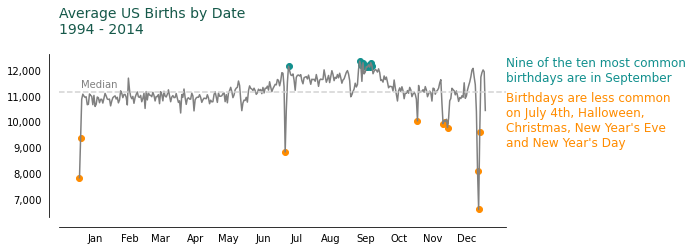

In [17]:
fig, ax = plt.subplots(figsize = (8,3))

labels = ['', 'Jan','Feb', 'Mar', 'Apr', 'May', 'Jun','Jul','Aug','Sep','Oct', 'Nov', 'Dec', '']

avg_births.plot(ax = ax, color = 'gray')



ax.set_title('Average US Births by Date\n1994 - 2014', loc = 'left', color = '#16594A', size = 14, pad = 20)
ax.tick_params(bottom = False, left = False)

ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday = 15))
ax.axhline(avg_births.describe()['50%'], linestyle = '--', color = 'lightgray')

ytick_labels = [label.get_text().strip('0')+'K' for label in ax.get_yticklabels()]
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,g}'))

ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(labels)
ax.set_xlabel('')

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
    
for spine in ['bottom', 'left']:
    ax.spines[spine].set_position(('outward',10))    
    
ax.scatter(x = least_common.index, y=least_common.births, color = 'darkorange')

ax.scatter(x = most_common.index, y = most_common.births, color = '#12908E')

ax.annotate('Median', xy=(1,avg_births.describe()['50%']), xytext = (0,5), textcoords = 'offset points', color = 'gray')


fig.text(s='Nine of the ten most common \nbirthdays are in September', x = .9, y = .75, color = '#12908E', size = 12)


fig.text(s='Birthdays are less common \non July 4th, Halloween, \nChristmas, New Year\'s Eve \nand New Year\'s Day', 
         x = .9, y = .45, color = 'darkorange', size = 12)



In [8]:
least_common.set_index('dob')

,births
dob,
12/25,6601.0
01/01,7827.0
12/24,8103.0
07/04,8825.0
01/02,9356.0
12/26,9599.0
11/27,9770.0
11/23,9919.0
11/25,10001.0


In [10]:
most_common.set_index('dob')

,births
dob,
09/09,12344.0
09/19,12285.0
09/12,12282.0
09/17,12201.0
09/10,12190.0
09/20,12162.0
07/07,12147.0
09/15,12126.0
09/16,12114.0


In [11]:
ax.get_xticks()

array([-17.,  14.,  45.,  73., 104., 134., 165., 195., 226., 257., 287.,
       318., 348., 379.])